<center>
<b><font size=6>Industry 4.0 의 중심, AI - ML&DL</font></b>
</center>

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect5. Logistic (regression) classifier

In [1]:
from tqdm import tqdm_notebook
from images import bigpycraft_copy as bpc

### <font color='brown'>로지스틱 회귀 (Logistic regression)</font>
> <a href="https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80">위키피디어 : 로지스틱 회귀 (Logistic regression)</a>
- 로지스틱 회귀는 D.R.Cox가 1958년에 제안한 확률 모델로서 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법이다.
- 로지스틱 회귀는 선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 (classification) 기법으로도 볼 수 있다.


### Regression
- 로지스틱 리그레션은 굉장히 정확도가 높은 좋은 알고리즘이다.
- 리니어에서 Hypothesis에서 Cost는 실제 직선과 가설이 얼마나 가까운가를 측정하는거였다.
- 그래서, Cost를 그려봤더니 포물선이었고 경사를 타고 내려가면 되는거였다. 즉 기울기만 보면 되었다.
- 얼마나 움직일지를 지정해주는 것이 Learning Rate 였다.

### Classification
- 분류는 둘중 하나를 결정하는거다.
- Spam Detection : Spam or Ham in E-mail
- Facebook feed : Show or Hide   cf. 좋아하는것만 보여준다.
- Credit Card Fraudulent Transaction detection : leitimate(0) or fraud(1)   cf. 합법 or 가짜
- Finance에서 주식 살까? 팔까?


<hr>
### Fail or Pass in Study
- Linear Regression 도 잘 활용할수 있을거 같은데..
- 근데, 한학생이 무지 열심히 공부했다. 한 100시간 정도..ㅎㅎ
- 이 상태에서 Linear 모델을 학습을 시키면, 기울기가 기울여지는데.. 어떤 데이터는 합격임에도 불구하고 불합격으로 예측할 수 있다.
- Linear가 모델이 간단하긴 한데, 결과값이 0~1사이로 압축하는 함수가 있으면 좋을듯~~ 
- 그래서, 찾은게 S자 모양으로 생긴.. Sigmoid 혹은 Logistic 이라고 한다.
- g(z)는 아무리 커도 1에 가까워지고, 아무리 작아도 0에 가까워만 진다.
- z=WX,   H(x)=g(z) 로~~~~  -WT는 W Transpose이다.


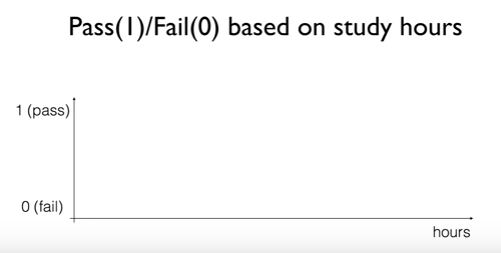

In [2]:
# 학습시간에 따른 이항변수 결과 
bpc.Figure(bpc.ML05_IMG_01, 650)

<hr>

$$ H(X) = W X $$
<br>
$$ z = H(X)  $$
<br>
$$  g(z) $$

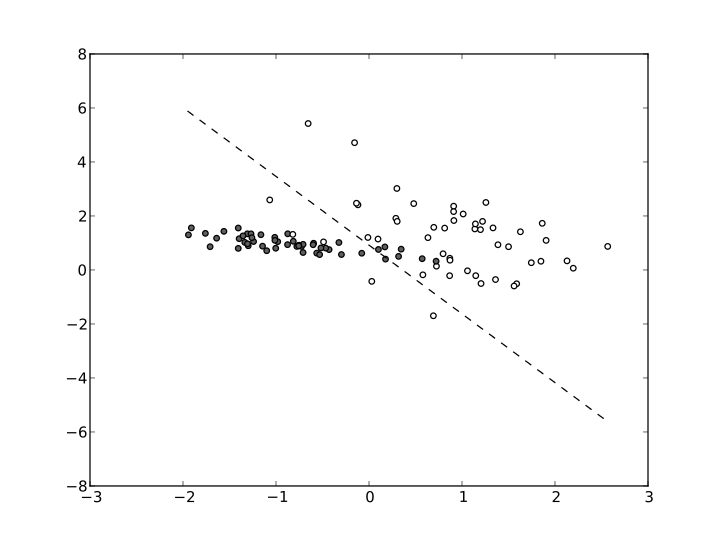

In [3]:
# 종속변수가 이항형 문제인 경우
bpc.Figure(bpc.ML05_IMG_02)

### <font color='brown'>로지스틱 함수</font>
> 
- 로지스틱 모형 식은 독립 변수가 [-∞,∞]의 어느 숫자이든 상관 없이 종속 변수 또는 결과 값이 항상 범위 [0,1] 사이에 있도록 한다. 
- 이는 오즈비(odds ratio)를 로짓(logit) 변환을 수행함으로써 얻어진다

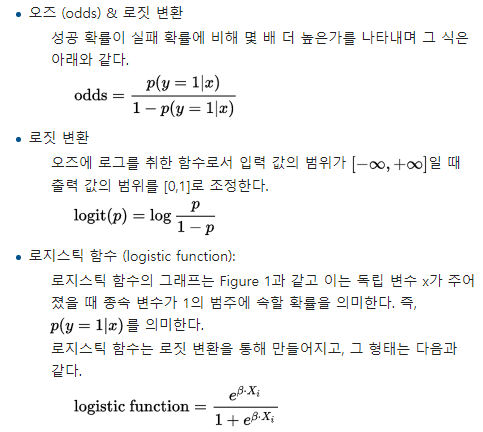

In [4]:
# 로지스틱 함수식
bpc.Figure(bpc.ML05_IMG_03)

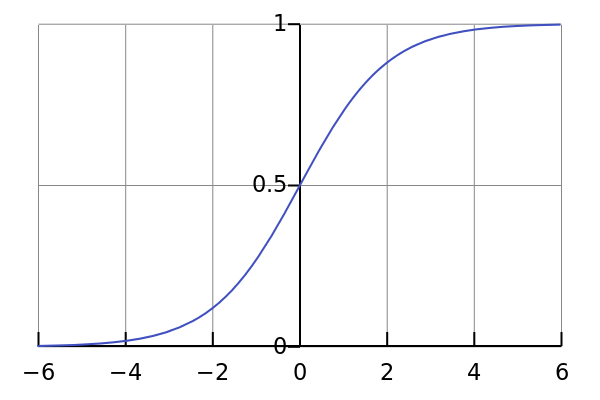

In [5]:
bpc.Figure(bpc.ML05_IMG_04)

### <font color='brown'>Logistic Regression Classifier</font>
> 
- Logistic Model : <a href="http://www.holehouse.org/mlclass/06_Logistic_Regression.html">holehouse.org / Logistic Regression</a>
- Cost Function : <a href='https://wikidocs.net/4289'>Logistic Regression Cost Function</a>

$$ H(X) = \frac{1}{1 + e^-W^TX} $$
<br>
$$ cost(W) = -\frac{1}{m} \sum y log(H(x)) + (1-y)(log(1 - H(x)) $$
<br>
$$ W := W - α \frac{σ}{σW} cost(W) $$

### Anyway, Cost를 최소화 하는 것이 최적화의 방법
<hr>
- y=1일때, 우리의 예측이 맞았다면, cost는 0
<br/> H(x) = 1 → cost(1) = 0
<br/><br/>
- y=1일때, 우리의 예측이 틀리다면, cost는 ∞ 
<br/> H(x) = 0 → cost(0) = ∞ 
<br/><br/>
- y=0일때, 우리의 예측이 맞았다면, cost는 0
<br/> H(x) = 0 → cost(0) = 0
<br/><br/>
- y=0일때, 우리의 예측이 틀리다면, cost는 ∞ 
<br/> H(x) = 1 → cost(1) = ∞ 
<br/><br/>

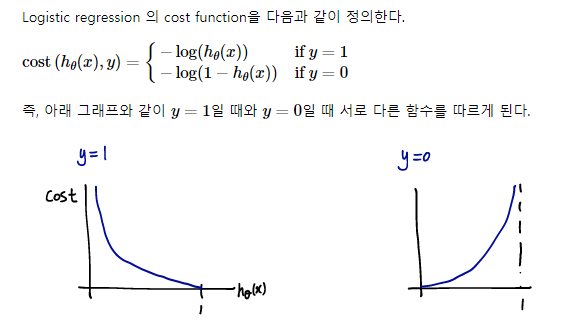

In [6]:
# Cost function
bpc.Figure(bpc.ML05_IMG_05)

<hr>
``` python
# tf.sigmoid

Signature: tf.sigmoid(x, name=None)
Docstring:
Computes sigmoid of `x` element-wise.

Specifically, `y = 1 / (1 + exp(-x))`.

Args:
  x: A Tensor with type `float16`, `float32`, `float64`, `complex64`,
    or `complex128`.
  name: A name for the operation (optional).

Returns:
  A Tensor with the same type as `x`.

```


### 주의사항
> Sigmoid : tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
- placeholder를 만들때 shape에 주의하라!!
- W, b 만 설정해주면, 그 다음부터는 기계적으로 적어주면 된다!!
- hypothesis 는 sigmoid를 써주면 되고,
- cost는 수식을 그대로 써주면 된다.
- 그리고, cost를 기울기를 minimize 해주면 알아서 학습한다.

<br/>
### 분류기준
>   
- 0.5가 기준이 되고, 
- hypothesis가 0.5보다 크면 1 합격이고
- hypothesis가 0.5보다 작으면 0 불합격


In [7]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

# Training Data 2dim: x1(hours), x2(attendence)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]  
# Result Data : y(0:fail or 1:pass)
y_data = [[0], [0], [0], [1], [1], [1]]                     

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [8]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(10001)):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0 or step < 10 :
            print("Step : {} \t Cost : {}".format(step, cost_val))
            
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})


A Jupyter Widget

Step : 0 	 Cost : 1.7307833433151245
Step : 1 	 Cost : 1.7099441289901733
Step : 2 	 Cost : 1.6891757249832153
Step : 3 	 Cost : 1.668479561805725
Step : 4 	 Cost : 1.6478610038757324
Step : 5 	 Cost : 1.627322793006897
Step : 6 	 Cost : 1.606866717338562
Step : 7 	 Cost : 1.5864976644515991
Step : 8 	 Cost : 1.5662188529968262
Step : 9 	 Cost : 1.5460346937179565
Step : 200 	 Cost : 0.5715119242668152
Step : 400 	 Cost : 0.507413923740387
Step : 600 	 Cost : 0.47182419896125793
Step : 800 	 Cost : 0.44758477807044983
Step : 1000 	 Cost : 0.42857107520103455
Step : 1200 	 Cost : 0.4123246371746063
Step : 1400 	 Cost : 0.39775505661964417
Step : 1600 	 Cost : 0.3843378722667694
Step : 1800 	 Cost : 0.3718010485172272
Step : 2000 	 Cost : 0.35999324917793274
Step : 2200 	 Cost : 0.34882211685180664
Step : 2400 	 Cost : 0.33822622895240784
Step : 2600 	 Cost : 0.32816052436828613
Step : 2800 	 Cost : 0.31858906149864197
Step : 3000 	 Cost : 0.3094808757305145
Step : 3200 	 Cost : 0.300808

In [9]:
print("# Hypothesis: \n{h} \n\n# Correct (Y): \n{c} \n\n# Accuracy: {a}".format(
    h = h, c = c, a = a
))

# Hypothesis: 
[[ 0.03074028]
 [ 0.15884678]
 [ 0.30486736]
 [ 0.78138196]
 [ 0.93957496]
 [ 0.98016882]] 

# Correct (Y): 
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]] 

# Accuracy: 1.0


### <font color='brown'>Classifying diabetes</font>
> 당뇨병 예측하는 실습 예제
- 예측값이 1이면 당뇨병 O
- 예측값이 0이면 당뇨병 X 

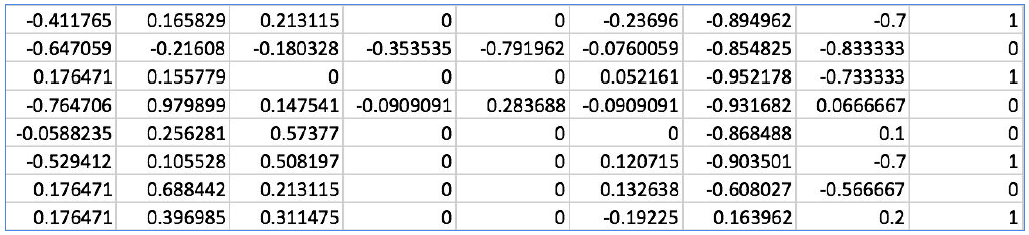

In [10]:
# 당뇨병 분류
bpc.Figure(bpc.ML05_IMG_06, 800)

In [11]:
import pandas as pd

# df = pd.read_csv("./data/data-03-diabetes.csv")
df = pd.read_csv("./data/data-03-diabetes.csv", header=None)
df.head(10)

0         1         2         3         4         5         6  \
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   
5 -0.411765  0.165829  0.213115  0.000000  0.000000 -0.236960 -0.894962   
6 -0.647059 -0.216080 -0.180328 -0.353535 -0.791962 -0.076006 -0.854825   
7  0.176471  0.155779  0.000000  0.000000  0.000000  0.052161 -0.952178   
8 -0.764706  0.979899  0.147541 -0.090909  0.283688 -0.090909 -0.931682   
9 -0.058824  0.256281  0.573770  0.000000  0.000000  0.000000 -0.868488   

          7  8  
0 -0.033333  0  
1 -0.666667  1  
2 -0.633333  0  
3  0.000000  1  
4 -0.600000  0  
5 -0.700000  1  
6 -0.833333  0  
7 -0.733333  1  
8  0.066667  0  
9  0.100000  0

In [12]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('./data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# print(x_data.shape, y_data.shape)
print(" x_data.shape : {x_shape} \n y_data.shape : {y_shape}".format(
        x_shape = x_data.shape, 
        y_shape = y_data.shape
    ))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


 x_data.shape : (759, 8) 
 y_data.shape : (759, 1)


In [13]:
print(len(xy)) 
xy[:10]

759


array([[-0.29411799,  0.48743701,  0.180328  , -0.29292899,  0.        ,
         0.00149028, -0.53117001, -0.0333333 ,  0.        ],
       [-0.88235301, -0.14572901,  0.0819672 , -0.414141  ,  0.        ,
        -0.20715301, -0.76686603, -0.66666698,  1.        ],
       [-0.0588235 ,  0.83919603,  0.0491803 ,  0.        ,  0.        ,
        -0.30551401, -0.49274099, -0.63333303,  0.        ],
       [-0.88235301, -0.105528  ,  0.0819672 , -0.53535402, -0.77777803,
        -0.162444  , -0.92399698,  0.        ,  1.        ],
       [ 0.        ,  0.37688401, -0.344262  , -0.29292899, -0.60283703,
         0.28465   ,  0.88727599, -0.60000002,  0.        ],
       [-0.41176501,  0.165829  ,  0.21311501,  0.        ,  0.        ,
        -0.23695999, -0.89496201, -0.69999999,  1.        ],
       [-0.64705902, -0.21608   , -0.180328  , -0.353535  , -0.79196203,
        -0.0760059 , -0.85482502, -0.83333302,  0.        ],
       [ 0.17647099,  0.155779  ,  0.        ,  0.        ,  0

In [14]:
print(len(x_data)) 
x_data[:10]

759


array([[-0.29411799,  0.48743701,  0.180328  , -0.29292899,  0.        ,
         0.00149028, -0.53117001, -0.0333333 ],
       [-0.88235301, -0.14572901,  0.0819672 , -0.414141  ,  0.        ,
        -0.20715301, -0.76686603, -0.66666698],
       [-0.0588235 ,  0.83919603,  0.0491803 ,  0.        ,  0.        ,
        -0.30551401, -0.49274099, -0.63333303],
       [-0.88235301, -0.105528  ,  0.0819672 , -0.53535402, -0.77777803,
        -0.162444  , -0.92399698,  0.        ],
       [ 0.        ,  0.37688401, -0.344262  , -0.29292899, -0.60283703,
         0.28465   ,  0.88727599, -0.60000002],
       [-0.41176501,  0.165829  ,  0.21311501,  0.        ,  0.        ,
        -0.23695999, -0.89496201, -0.69999999],
       [-0.64705902, -0.21608   , -0.180328  , -0.353535  , -0.79196203,
        -0.0760059 , -0.85482502, -0.83333302],
       [ 0.17647099,  0.155779  ,  0.        ,  0.        ,  0.        ,
         0.052161  , -0.952178  , -0.73333299],
       [-0.76470602,  0.97989899

In [15]:
print(len(y_data)) 
y_data[:10]

759


array([[ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.]], dtype=float32)

In [16]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(10001)):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})       
        if step % 200 == 0 or step < 10 :
            print("Step : {} \t Cost : {}".format(step, cost_val))    

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    

A Jupyter Widget

Step : 0 	 Cost : 0.9742217659950256
Step : 1 	 Cost : 0.971756100654602
Step : 2 	 Cost : 0.9693099856376648
Step : 3 	 Cost : 0.9668837189674377
Step : 4 	 Cost : 0.9644768238067627
Step : 5 	 Cost : 0.9620894193649292
Step : 6 	 Cost : 0.9597213864326477
Step : 7 	 Cost : 0.9573721885681152
Step : 8 	 Cost : 0.9550421833992004
Step : 9 	 Cost : 0.9527310729026794
Step : 200 	 Cost : 0.7338058948516846
Step : 400 	 Cost : 0.6805428862571716
Step : 600 	 Cost : 0.657383143901825
Step : 800 	 Cost : 0.6405060291290283
Step : 1000 	 Cost : 0.6259894967079163
Step : 1200 	 Cost : 0.6130378842353821
Step : 1400 	 Cost : 0.601396381855011
Step : 1600 	 Cost : 0.5909146666526794
Step : 1800 	 Cost : 0.5814695358276367
Step : 2000 	 Cost : 0.5729515552520752
Step : 2200 	 Cost : 0.565261721611023
Step : 2400 	 Cost : 0.5583115816116333
Step : 2600 	 Cost : 0.5520213842391968
Step : 2800 	 Cost : 0.5463204383850098
Step : 3000 	 Cost : 0.5411450862884521
Step : 3200 	 Cost : 0.536439538002014

In [17]:
print("# Hypothesis: \n{h} \n\n# Correct (Y): \n{c} \n\n# Accuracy: {a}".format(
    # h = h, c = c, a = a
    h = h[:20], c = c[:20], a = a
))

# Hypothesis: 
[[ 0.3700318 ]
 [ 0.91548049]
 [ 0.2160273 ]
 [ 0.94834936]
 [ 0.08354768]
 [ 0.76475239]
 [ 0.94660914]
 [ 0.62400979]
 [ 0.24575186]
 [ 0.53068644]
 [ 0.70052212]
 [ 0.1721466 ]
 [ 0.16543274]
 [ 0.2199429 ]
 [ 0.71247762]
 [ 0.45385253]
 [ 0.73282206]
 [ 0.86161494]
 [ 0.81474245]
 [ 0.55559713]] 

# Correct (Y): 
[[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]] 

# Accuracy: 0.7667984366416931


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>